<a href="https://colab.research.google.com/github/Faz12345/BST/blob/main/Copy_of_Churn_EDA_Predictiong_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.metrics import f1_score,precision_score,accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,RobustScaler,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import *

In [ ]:
data = read_excel('/content/Customer_Churn_Data_Large.xlsx')
data.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [ ]:
data.drop(columns=['CustomerID'],inplace=True)
data.head()

,Age,Gender,MaritalStatus,IncomeLevel
0,62,M,Single,Low
1,65,M,Married,Low
2,18,M,Single,Low
3,21,M,Widowed,Low
4,21,M,Divorced,Medium


In [ ]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   int64 
 1   Gender         1000 non-null   object
 2   MaritalStatus  1000 non-null   object
 3   IncomeLevel    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


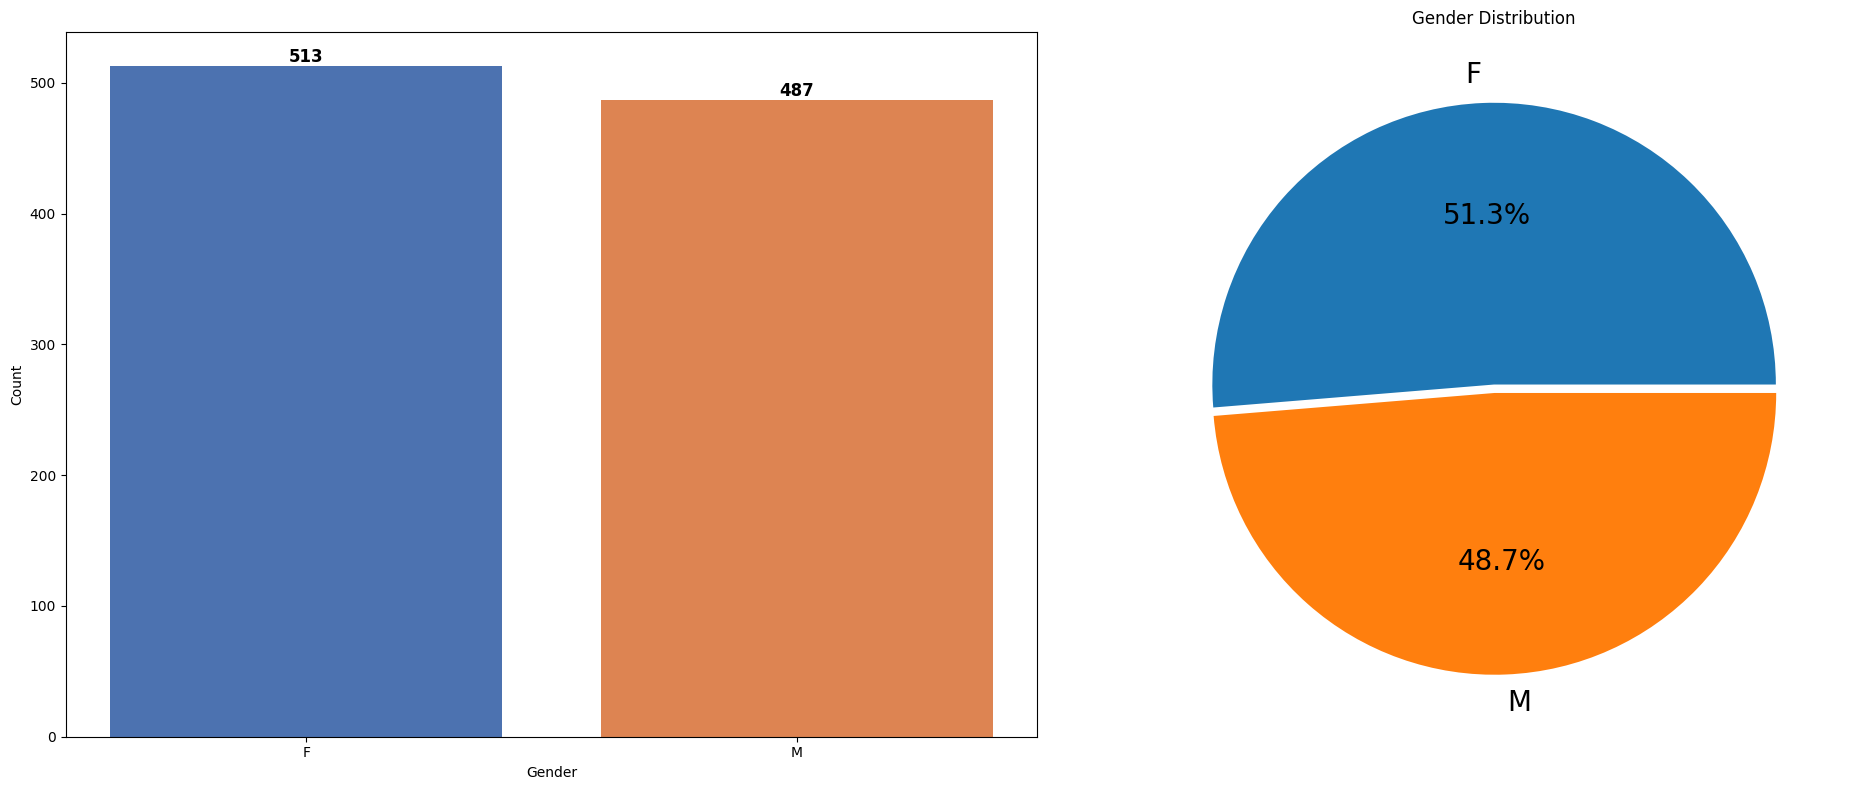

In [ ]:
figure(figsize=(20,8))
subplot(1,2,1)
gender_count = data['Gender'].value_counts()
bars = bar(gender_count.index,gender_count.values,color=color_palette('deep'))
bar_label(bars,fontweight='bold',fontsize=12)
xlabel('Gender')
ylabel('Count')

subplot(1,2,2)
pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=0,explode=tuple([0]+[0.03]*(len(gender_count)-1)),textprops={'fontsize':20})
title('Gender Distribution')
tight_layout()
show()

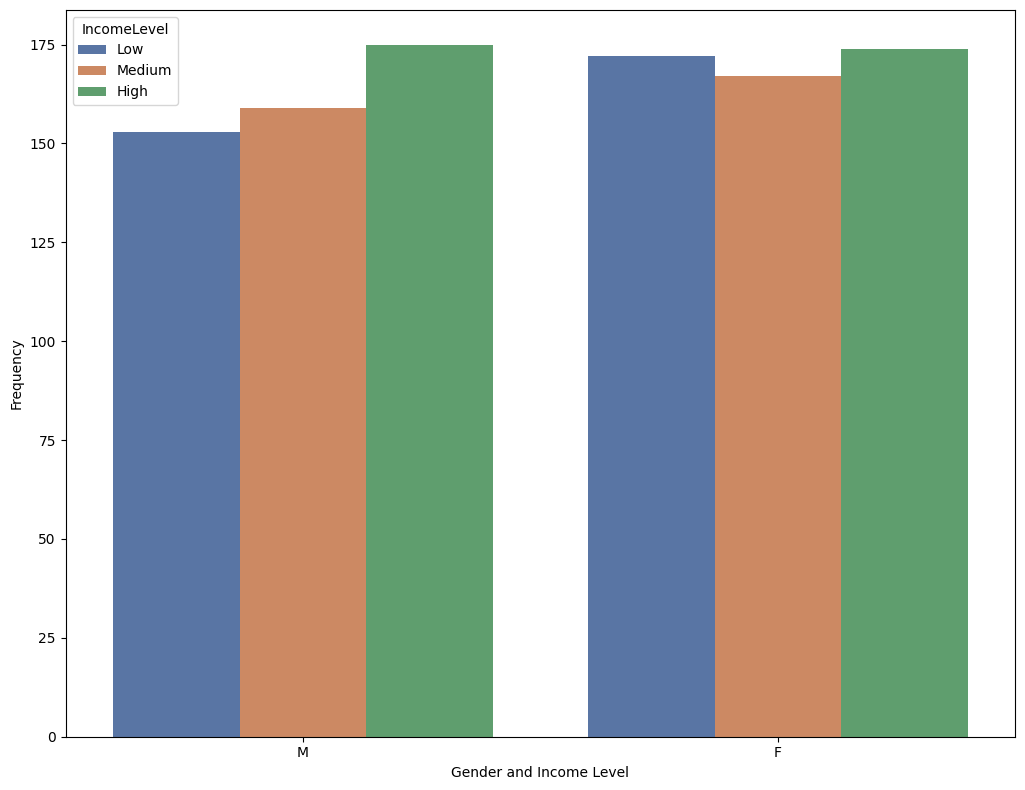

In [ ]:
figure(figsize=(20,8))
subplot(1,2,1)
countplot(data=data,x='Gender',hue='IncomeLevel',palette='deep')
xlabel('Gender and Income Level')
ylabel('Frequency')
tight_layout()
show()

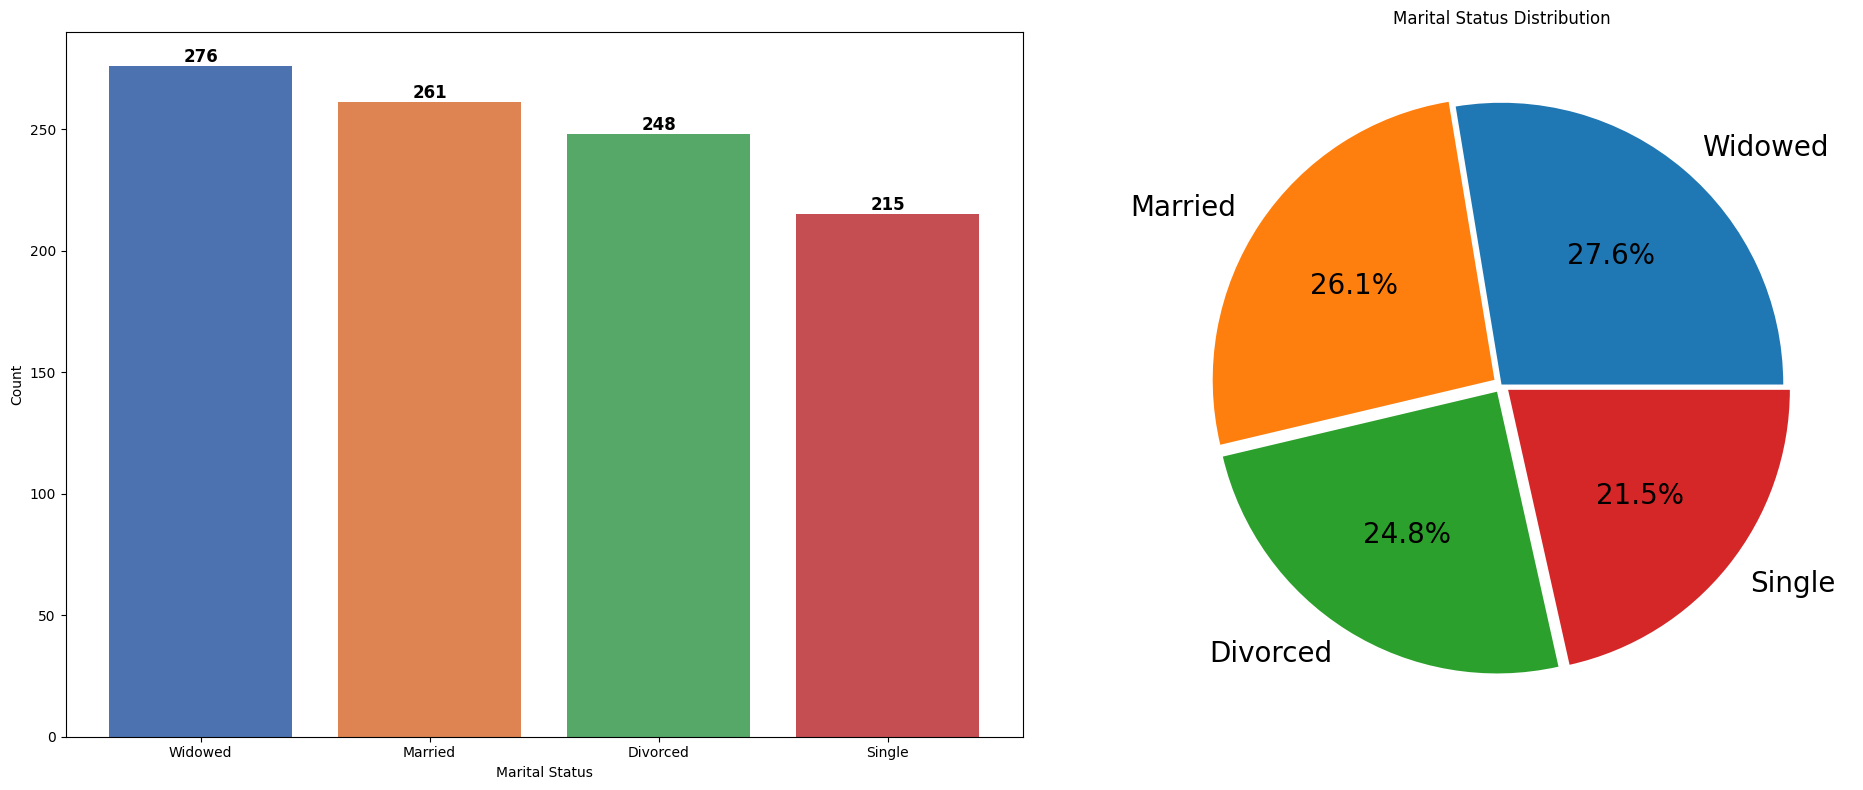

In [ ]:
figure(figsize=(20,8))
subplot(1,2,1)
marital_status_count = data['MaritalStatus'].value_counts()
bars = bar(marital_status_count.index,marital_status_count.values,color=color_palette('deep'))
bar_label(bars,fontweight='bold',fontsize=12)
xlabel('Marital Status')
ylabel('Count')

subplot(1,2,2)
pie(marital_status_count,labels=marital_status_count.index,autopct='%1.1f%%',startangle=0,explode=tuple([0]+[0.03]*(len(marital_status_count)-1)),textprops={'fontsize':20})
title('Marital Status Distribution')
tight_layout()
show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X = data.drop(columns=['IncomeLevel','MaritalStatus'])
y = data[['IncomeLevel']]
num_features = X.select_dtypes(include=['int64']).columns
cat_features = X.select_dtypes(include=['object']).columns
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
num_transform = Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='median')),
    ('Scaler',RobustScaler())
])
cat_transform = Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoding',OneHotEncoder(handle_unknown='ignore'))
])
prepro = ColumnTransformer(transformers=[
    ('num',num_transform,num_features),
    ('cat',cat_transform,cat_features)
])

Training and evaluating Random Froest:


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 score:0.33974295749536443
precision score:0.341018429094295
accuracy score:0.3433333333333333
classification Report:               precision    recall  f1-score   support

        High       0.38      0.43      0.40       105
         Low       0.32      0.25      0.28        97
      Medium       0.32      0.35      0.33        98

    accuracy                           0.34       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.34      0.34       300

Confused Matrix: [[45 27 33]
 [33 24 40]
 [41 23 34]]


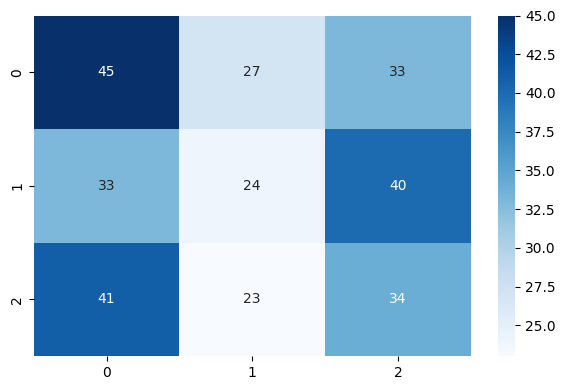

------------------------------------------------------------------
Training and evaluating Ada classifier:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score:0.3515630480468531
precision score:0.36450507292382656
accuracy score:0.36666666666666664
classification Report:               precision    recall  f1-score   support

        High       0.39      0.55      0.46       105
         Low       0.33      0.34      0.33        97
      Medium       0.37      0.19      0.26        98

    accuracy                           0.37       300
   macro avg       0.36      0.36      0.35       300
weighted avg       0.36      0.37      0.35       300

Confused Matrix: [[58 32 15]
 [47 33 17]
 [43 36 19]]


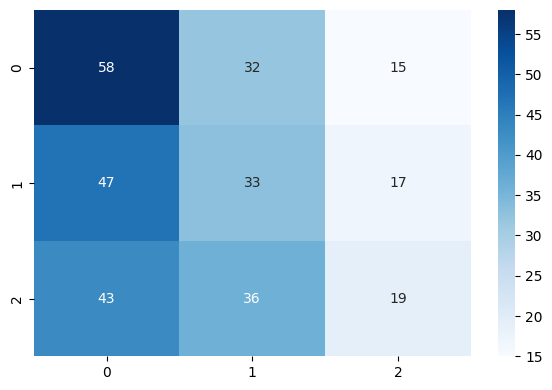

------------------------------------------------------------------
Training and evaluating Gradient Classifier:


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score:0.35267190820229494
precision score:0.3544948581842376
accuracy score:0.35333333333333333
classification Report:               precision    recall  f1-score   support

        High       0.34      0.38      0.36       105
         Low       0.37      0.37      0.37        97
      Medium       0.36      0.31      0.33        98

    accuracy                           0.35       300
   macro avg       0.35      0.35      0.35       300
weighted avg       0.35      0.35      0.35       300

Confused Matrix: [[40 37 28]
 [36 36 25]
 [43 25 30]]


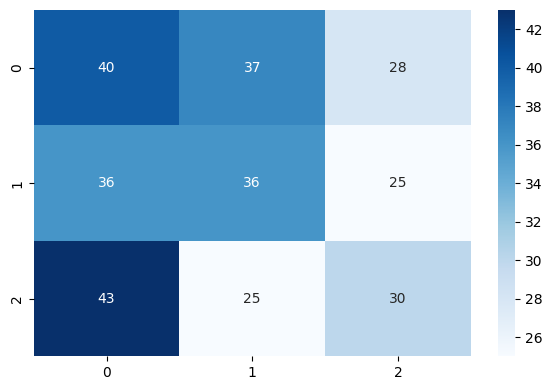

------------------------------------------------------------------


In [ ]:
def train_test_model(classifier,name,X_train,X_test,y_train,y_test):
    models = Pipeline(steps=[
        ('pre',prepro),
        ('classifier',classifier)
    ])
    models.fit(X_train,y_train)
    y_pred = models.predict(X_test)
    print(f'F1 score:{f1_score(y_test,y_pred,average="weighted")}')
    print(f'precision score:{precision_score(y_test,y_pred,average="weighted")}')
    print(f'accuracy score:{accuracy_score(y_test,y_pred)}')
    print('classification Report:',classification_report(y_test,y_pred))
    print('Confused Matrix:',confusion_matrix(y_test,y_pred))
    figure(figsize=(6,4))
    heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
    tight_layout()
    show()
models = {
    "Random Froest:":RandomForestClassifier(criterion='gini',n_estimators=100,random_state=42,max_depth=20,min_samples_leaf=10),
    'Ada classifier:':AdaBoostClassifier(n_estimators=100,random_state=42),
    'Gradient Classifier:':GradientBoostingClassifier(criterion='squared_error',n_estimators=100,random_state=42)
}

for name,model in models.items():
    print(f"Training and evaluating {name}")
    train_test_model(model,name,X_train,X_test,y_train,y_test)
    print('------------------------------------------------------------------')